# Demo Notebook for 20151226 - Sandgate

In [1]:
#imports
from __future__ import print_function
import pyart
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
import os
from netCDF4 import num2date, date2num
import cartopy.io.img_tiles as cimgt
import cartopy.crs as ccrs


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



### Plot 2016 dataset

/home/meso/anaconda2/lib/python2.7/site-packages/cartopy/img_transform.py:80: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  endpoint=False)
/home/meso/anaconda2/lib/python2.7/site-packages/cartopy/img_transform.py:80: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  endpoint=False)
/home/meso/anaconda2/lib/python2.7/site-packages/cartopy/img_transform.py:80: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  endpoint=False)
/home/meso/anaconda2/lib/python2.7/site-packages/cartopy/img_transform.py:80: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  endpoint=False)


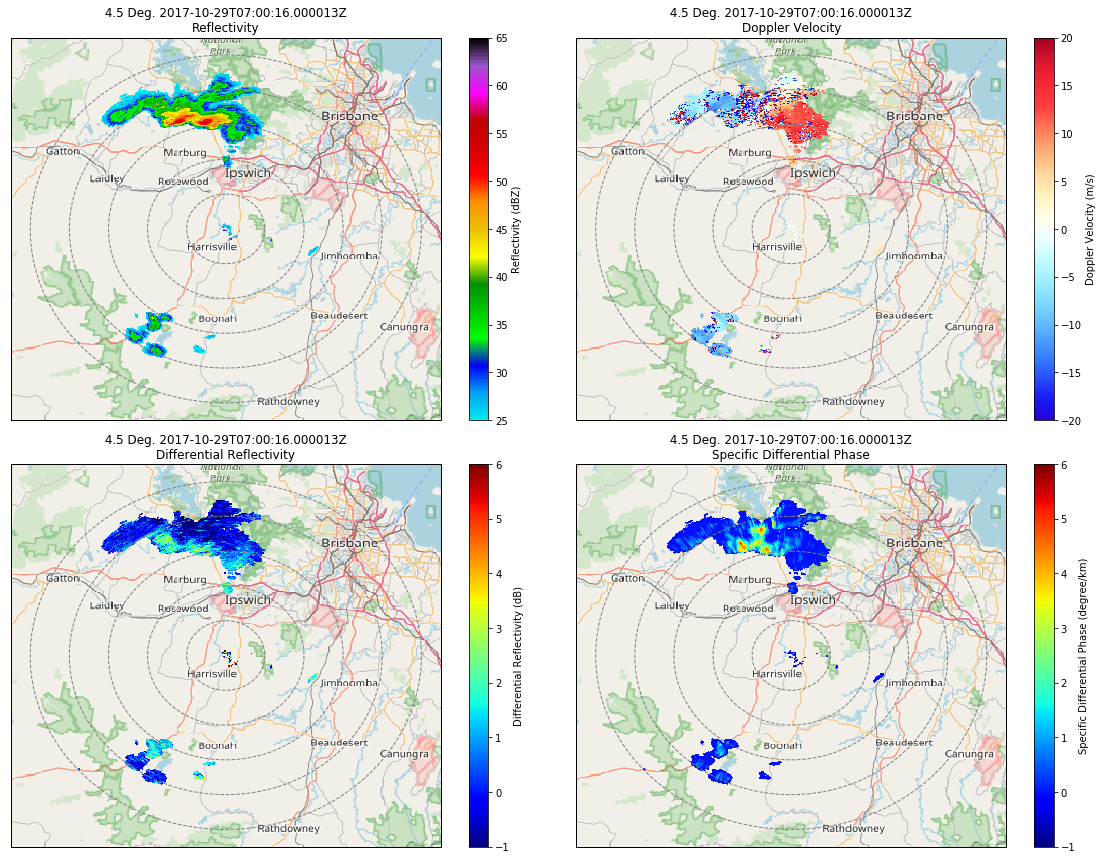

In [4]:
#input file
fn    = '/home/meso/Desktop/case_radar/20171029/odimh5/99_20171029_070016_03.h5'

#field ranges
dbz_min  = 25
dbz_max  = 65
dbz_cmap = 'pyart_NWSRef'
vel_min  = -20
vel_max  = 20
vel_cmap = 'pyart_BuDRd18'
spw_min  = 0
spw_max  = 5
spw_cmap = 'Reds'
zdr_min  = -1
zdr_max  = 6
zdr_cmap = 'jet'
kdp_min  = -1
kdp_max  = 6
kdp_cmap = 'jet'
cc_min   = 0
cc_max   = 1
cc_cmap  = 'jet'
axis_sz  = [16, 12]
sweep    = 0

#load radar
radar = pyart.aux_io.read_odim_h5(fn, file_field_names=True)

#correct fields
radar.fields['DBZH']['standard_name'] = 'Reflectivity'
radar.fields['DBZH']['units'] = 'dBZ'
radar.fields['DBZH']['long_name'] = 'Reflectivity'
radar.fields['VRADH']['standard_name'] = 'Doppler Velocity'
radar.fields['VRADH']['units'] = 'm/s'
radar.fields['VRADH']['long_name'] = 'Doppler Velocity'
radar.fields['WRADH']['standard_name'] = 'Spectral Width'
radar.fields['WRADH']['units'] = 'm/s'
radar.fields['WRADH']['long_name'] = 'Spectral Width'
radar.fields['ZDR']['standard_name'] = 'Differential Reflectivity'
radar.fields['ZDR']['units'] = 'dB'
radar.fields['ZDR']['long_name'] = 'Differential Reflectivity'
radar.fields['KDP']['standard_name'] = 'Specific Differential Phase'
radar.fields['KDP']['units'] = 'degree/km'
radar.fields['KDP']['long_name'] = 'Specific Differential Phase'
radar.fields['RHOHV']['standard_name'] = 'Correlation Coefficient'
radar.fields['RHOHV']['units'] = ''
radar.fields['RHOHV']['long_name'] = 'Correlation Coefficient'

#exclude mask
gatefilter = pyart.correct.GateFilter(radar)
gatefilter.exclude_below('DBZH',dbz_min)

#call display
display = pyart.graph.RadarMapDisplayCartopy(radar)

def plot_ppi(display,fig,subplt,field,vmin,vmax,cmap,gatefilter):
    #generate figure
    ax  = plt.subplot(subplt,projection = ccrs.PlateCarree())
    #generate plot
    display.plot_ppi_map(field, sweep=sweep, ax=ax,
             vmin=vmin, vmax=vmax, cmap=cmap,
	     gatefilter=gatefilter, resolution = '10m',embelish=False)

    #Range Rings
    display.plot_range_rings([10,20,30,40,50], ax=ax, col='0.5', ls='--', lw=1)
    #OSM layers
    request = cimgt.OSM()
    ax.add_image(request, 9, zorder = 0)
    

fig = plt.figure(figsize=axis_sz)

plot_ppi(display,fig,221,'DBZH',dbz_min,dbz_max,dbz_cmap,gatefilter)
plot_ppi(display,fig,222,'VRADH',vel_min,vel_max,vel_cmap,gatefilter)
plot_ppi(display,fig,223,'ZDR',zdr_min,zdr_max,zdr_cmap,gatefilter)
plot_ppi(display,fig,224,'KDP',kdp_min,kdp_max,kdp_cmap,gatefilter)

#output
out_fn = 'case_test.png'
plt.tight_layout()
plt.savefig(out_fn, dpi=75)

    